# Experimenting with Kedro inside Jupyter notebooks
**Author**: Emmanuel Gyasi Baaye\
**Created**: 2024-08-12\
The Goals of this notebook is to illustrate the potential benefit of kedro and its interaction with Jupyter notebooks.

## Existing Approach to loading data
Currently when we want to load data we sometimes have to write a few lines to maybe a lot more lines in order to get the data we are looking for
1.  loading a CSV where you have to specify a full path. Explicit path ensures data can be found, but is verbose
```
companies = pd.read_csv("/workspaces/KedroDemo/data/01_raw/companies.csv")
```
2. Alternatively you can provide a relative path
```
companies = pd.read_csv("../data/01_raw/companies.csv")
```

In [ ]:
import pandas as pd

# Loading full path to dataset 
companies = pd.read_csv("/workspaces/KedroDemo/data/01_raw/companies.csv")

# alternatively  you can specify a relative path
companies = pd.read_csv("../data/01_raw/companies.csv")


2. Loading a CSV where you specify relative path. Needs to be updated if notebook directory has changed

Both methods are potentially error prone as moving directories of notebook, or moving directories of data can cause issues. furthermore, any change to directory would require updating any notebook that references this path. Alternatively you could duplicate the data, but now we create multiple datasets that should be the same source and immutable.

Alternatively loading data from azure looks like this

3. Loading a Table dataset from Azureml per recommended interactive approach. interactive approach requires specifying a version which is an issue whenever the source dataset gets updated

In [ ]:
import mltable
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

ml_client = MLClient.from_config(credential=DefaultAzureCredential())
data_asset = ml_client.data.get("Gob_Data_Raw_April2024", version="2")

tbl = mltable.load(f'azureml:/{data_asset.id}')

df = tbl.to_pandas_dataframe()

Depending on what dataset you load you may have to repeatedly copy and paste repetative code

## Kedro approach: abstract data loading

In [ ]:
# If kernel not already installed, add conda envornment to ipykernels. TODO make sure you don't need to do this
# python -m ipykernel install --user --name kedro2 --display-name "kedro Envrionemnt v2"

In [5]:
%load_ext kedro.ipython
%reload_kedro /home/azureuser/cloudfiles/code/Users/emmanuel.gyasibaaye/kedro/spaceflights
# %reload_kedro

[09/30/24 19:20:02] INFO     Using                                                                  ]8;id=110124;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/framework/project/__init__.py\__init__.py]8;;\:]8;id=756232;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/framework/project/__init__.py#249\249]8;;\
                             '/anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/f                
                             ramework/project/rich_logging.yml' as logging configuration.                          

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=936918;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=700327;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/ipython/__init__.py#58\58]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=998977;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=16920;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/ipython/__init__.py#60\60]8;;\

                    INFO     Resolved project path as:                                              ]8;id=78101;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=592630;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/ipython/__init__.py#175\175]8;;\
                             /mnt/batch/tasks/shared/LS_root/mounts/clusters/eman-compute-merge/cod                
                             e/Users/emmanuel.gyasibaaye/kedro/spaceflights.                                       
                             To set a different path, run '%reload_kedro <project_root>'                           

[09/30/24 19:20:04] INFO     Kedro project spaceflights                                             ]8;id=705203;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=656236;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/ipython/__init__.py#141\141]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=584136;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=456677;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/ipython/__init__.py#142\142]8;;\
                             'pipelines'                                                                           

[09/30/24 19:20:05] INFO     Registered line magic 'run_viz'                                        ]8;id=543887;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=163413;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/ipython/__init__.py#148\148]8;;\

[09/30/24 19:20:06] INFO     Kedro project spaceflights                                             ]8;id=78522;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=410229;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/ipython/__init__.py#141\141]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=249284;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=51343;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/ipython/__init__.py#142\142]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=843106;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=599781;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/ipython/__init__.py#148\148]8;;\

In [6]:
catalog.list()


[
    'companies',
    'reviews',
    'shuttles',
    'processing_pipeline.preprocessed_companies',
    'processing_pipeline.preprocessed_shuttles',
    'processing_pipeline.model_input_table',
    'active_modelling_pipeline.regressor',
    'active_modelling_pipeline.X_test',
    'active_modelling_pipeline.y_test',
    'candidate_modelling_pipeline.regressor',
    'active_modelling_pipeline.metrics',
    'candidate_modelling_pipeline.metrics',
    'processing_pipeline.companies_columns',
    'reporting_pipeline.shuttle_passenger_capacity_plot_exp',
    'reporting_pipeline.shuttle_passenger_capacity_plot_go',
    'reporting_pipeline.dummy_confusion_matrix',
    'parameters',
    'params:active_modelling_pipeline',
    'params:active_modelling_pipeline.model_options',
    'params:active_modelling_pipeline.model_options.test_size',
    'params:active_modelling_pipeline.model_options.random_state',
    'params:active_modelling_pipeline.model_options.features',
    'params:candidate_modell

Above i printed all the datsets or configs available

In [7]:
shuttles = catalog.load("shuttles")
shuttles.head()

[09/30/24 19:20:10] INFO     Loading data from shuttles (ExcelDataset)...                       ]8;id=320401;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=117272;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/io/data_catalog.py#539\539]8;;\

,id,shuttle_location,shuttle_type,engine_type,engine_vendor,engines,passenger_capacity,cancellation_policy,crew,d_check_complete,moon_clearance_complete,price,company_id
0,45163,Sao Tome and Principe,Type V5,Plasma,ThetaBase Services,2.0,4,moderate,2.0,f,f,"$1,715.0",32413
1,49438,Wallis and Futuna,Type V2,Plasma,ThetaBase Services,3.0,5,moderate,3.0,f,f,"$3,405.0",14122
2,10750,Niue,Type F5,Quantum,ThetaBase Services,1.0,2,strict,1.0,t,f,"$1,806.0",47761
3,4146,Malta,Type V2,Quantum,ThetaBase Services,1.0,2,moderate,1.0,f,f,"$1,676.0",26648
4,5067,Malta,Type V2,Plasma,ThetaBase Services,5.0,10,strict,5.0,f,f,"$4,718.0",26648


In [8]:
type(shuttles)

<class 'pandas.core.frame.DataFrame'>

In [ ]:
catalog.load("parameters")

type(shuttles)

In [ ]:
pipelines['data_processing']

In [ ]:
session.run(pipeline_name='data_processing')

# Adding a real vs predicted plot
goal of this section is to illustrate how a potential workflow will start with developing code in a jupyter notebook, then adding the code to an existing pipeline

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
%reload_kedro

[09/30/24 19:20:24] INFO     Resolved project path as:                                              ]8;id=367702;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=253793;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/ipython/__init__.py#175\175]8;;\
                             /mnt/batch/tasks/shared/LS_root/mounts/clusters/eman-compute-merge/cod                
                             e/Users/emmanuel.gyasibaaye/kedro/spaceflights.                                       
                             To set a different path, run '%reload_kedro <project_root>'                           

[09/30/24 19:20:25] INFO     Kedro project spaceflights                                             ]8;id=127128;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=320143;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/ipython/__init__.py#141\141]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=669464;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=475259;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/ipython/__init__.py#142\142]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=580931;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=542592;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/ipython/__init__.py#148\148]8;;\

In [11]:
catalog.list()


[
    'companies',
    'reviews',
    'shuttles',
    'processing_pipeline.preprocessed_companies',
    'processing_pipeline.preprocessed_shuttles',
    'processing_pipeline.model_input_table',
    'active_modelling_pipeline.regressor',
    'active_modelling_pipeline.X_test',
    'active_modelling_pipeline.y_test',
    'candidate_modelling_pipeline.regressor',
    'active_modelling_pipeline.metrics',
    'candidate_modelling_pipeline.metrics',
    'processing_pipeline.companies_columns',
    'reporting_pipeline.shuttle_passenger_capacity_plot_exp',
    'reporting_pipeline.shuttle_passenger_capacity_plot_go',
    'reporting_pipeline.dummy_confusion_matrix',
    'parameters',
    'params:active_modelling_pipeline',
    'params:active_modelling_pipeline.model_options',
    'params:active_modelling_pipeline.model_options.test_size',
    'params:active_modelling_pipeline.model_options.random_state',
    'params:active_modelling_pipeline.model_options.features',
    'params:candidate_modell

In [12]:
model = catalog.load("active_modelling_pipeline.regressor")

                    INFO     Loading data from active_modelling_pipeline.regressor              ]8;id=509895;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=573176;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/io/data_catalog.py#539\539]8;;\
                             (PickleDataset)...                                                                    

In [23]:
X_test = catalog.load("active_modelling_pipeline.X_test")

[09/30/24 19:52:15] INFO     Loading data from active_modelling_pipeline.X_test (CSVDataset)... ]8;id=679747;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=336526;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/io/data_catalog.py#539\539]8;;\

In [24]:
y_test = catalog.load("active_modelling_pipeline.y_test")

[09/30/24 19:52:16] INFO     Loading data from active_modelling_pipeline.y_test (CSVDataset)... ]8;id=112190;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=392081;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/io/data_catalog.py#539\539]8;;\

In [22]:
df = catalog.load("processing_pipeline.model_input_table")
df.shape

[09/30/24 19:51:54] INFO     Loading data from processing_pipeline.model_input_table            ]8;id=241602;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=966487;file:///anaconda/envs/kedro-environment/lib/python3.11/site-packages/kedro/io/data_catalog.py#539\539]8;;\
                             (ParquetDataset)...                                                                   

(6027, 27)

In [63]:

y_pred = model.predict(X_test)

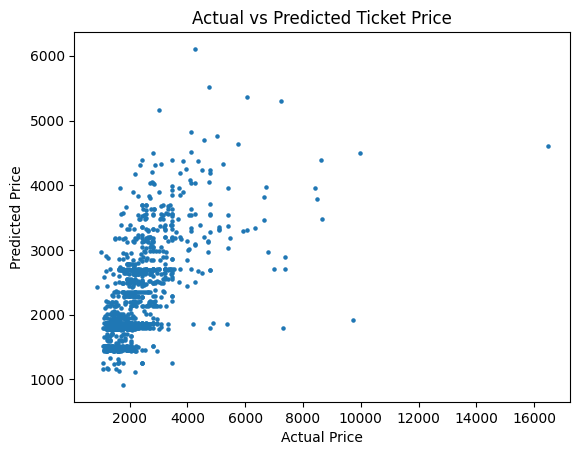

In [71]:
def plotGraph(y_test,y_pred,regressorName = "regressor"):
    plt.scatter(y_test, y_pred, s =5)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted Ticket Price')
    plt.show()

plotGraph(y_test, y_pred)

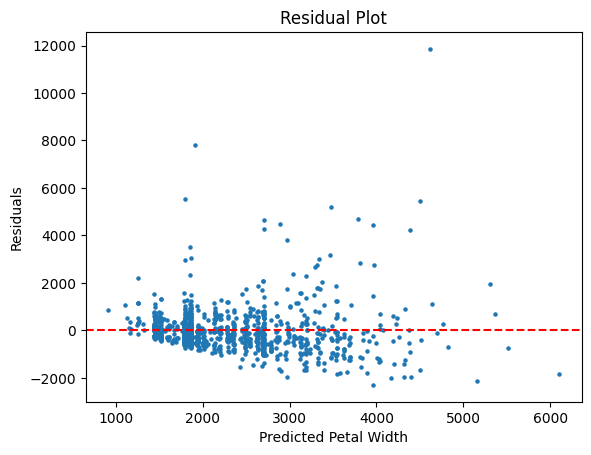

In [70]:
residuals = y_test['price'] - y_pred
plt.scatter(y_pred, residuals, s=5)
plt.xlabel('Predicted Petal Width')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [74]:
test_df = pd.DataFrame() 
test_df['y_test'] = y_test['price']
test_df['y_pred'] = y_pred



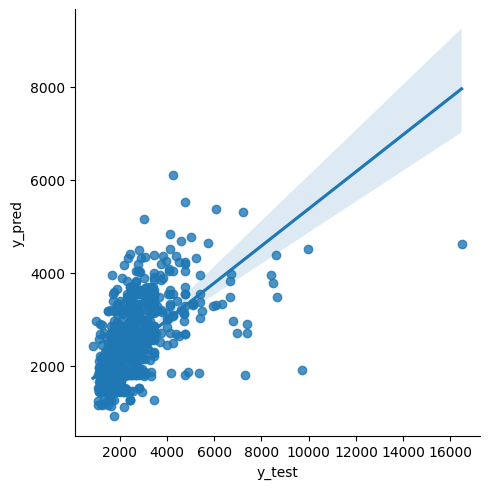

In [75]:
import seaborn as sns

sns.lmplot(x='y_test', y='y_pred', data=test_df, fit_reg=True, ci=95, n_boot=1000)